# EXERCISE: Clustering Insurance Leads with Survey Results

Consider that you’re a marketing manager at an insurance firm and that you want to customize your offerings to suit the needs of your customers. You’ve decided to try out customer profiling and segmentation. After much thought, you decide on the two factors that you think the customers would value the most. Those are:
* A savings on premium paid
* The local availability of nearby insurance agents <br><br>

The importance of these factors will be measured using something called the “likert scale”, wherein a rating of 1 represents not important and a rating of 7 represent very important. 
You conduct the survey with 150 respondents.  The survey results are in a CSV file called “Survey Results.csv”
1. How many segments would you create?
2. Describe each segment you create in terms of the input variables
3. How would you target each customer segment?


## Import the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

## Load and Explore the Dataset

The file we'll be working with is called "Survey Results.csv"

In [39]:
df = pd.read_csv("./Survey Results.csv")

In [40]:
df.head()

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


In [41]:
df.describe(include='all')

,Premium Savings very important,Agent Not Important
count,150.000000,150.000000
mean,4.093333,4.046667
std,1.918986,2.014500
min,1.000000,1.000000
25%,3.000000,2.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,7.000000,7.000000


## Train a Clustering Model

In [42]:
#identify actionable features to define customer segments
X = df[['Premium Savings very important', 'Agent Not Important']]

In [43]:
X.head()

,Premium Savings very important,Agent Not Important
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


C:\Users\AMD-RYZEN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AMD-RYZEN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'CustomerSegmentation')

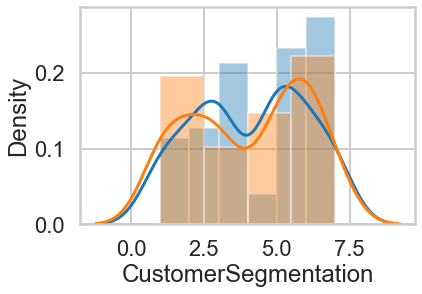

In [44]:
#Remove outliers if any and normalize as needed
#visualizing the data - displot
plot_premium = sns.distplot(df['Premium Savings very important'])
plot_agent = sns.distplot(df['Agent Not Important'])
plt.xlabel('CustomerSegmentation')

In [45]:
#identify cluster via K-means
from sklearn.cluster import KMeans

In [46]:
#use elbow method to determine optimal K
sse = []

for i in range(1,11):
    km=KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

C:\Users\AMD-RYZEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'sse')

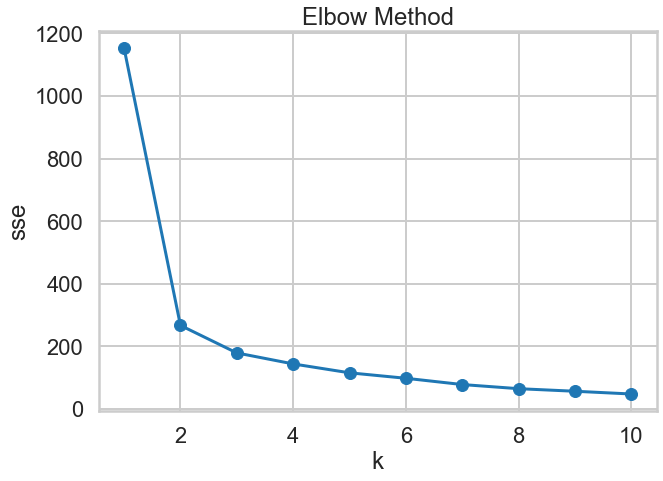

In [47]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range(1,11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("sse")

In [75]:
#we will use 2 k means
##Fitting kmeans to the dataset with k=2
km=KMeans(n_clusters=2, max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(X)

In [76]:
## Add the labels to the original dataframe
df_res = df.copy()
df_res['Label'] = y_means

In [77]:
df_res.head()

,Premium Savings very important,Agent Not Important,Label
0,5,5,1
1,6,7,1
2,6,5,1
3,6,6,1
4,5,6,1


In [78]:
df_res[(df_res.Label == 3)].describe(include="all")

,Premium Savings very important,Agent Not Important,Label
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


## Visualize the Results

C:\Users\AMD-RYZEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premium Savings very important', ylabel='Agent Not Important'>

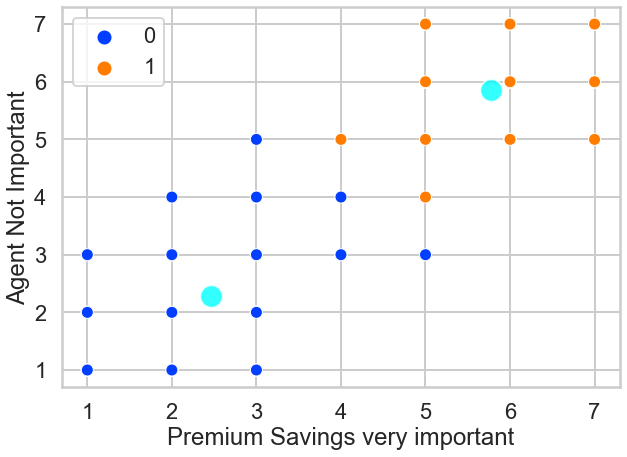

In [79]:
#Visualizing the clusters for k=2

#Set a color palette
bright_colors = sns.color_palette("bright", 2)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_res['Premium Savings very important'], y=df_res['Agent Not Important'], hue=df_res.Label, 
                palette=bright_colors)

#Add on the cluster centers
centers = km.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

## Analyze the Clusters

In [80]:
df_res.Label.value_counts()

0    76
1    74
Name: Label, dtype: int64

In [81]:
#in the label of 0 says that 
#many people vote that premium savings is very important, and less vote for agent not important
df_res[(df_res.Label == 0)].describe()

,Premium Savings very important,Agent Not Important,Label
count,76.000000,76.000000,76.0
mean,2.460526,2.289474,0.0
std,1.063839,1.093201,0.0
min,1.000000,1.000000,0.0
25%,2.000000,1.000000,0.0
50%,3.000000,2.000000,0.0
75%,3.000000,3.000000,0.0
max,5.000000,5.000000,0.0


In [82]:
#in the label 1 says that
#many people vote that agent is not important, and less vote for premium saving very important
df_res[(df_res.Label == 1)].describe()

,Premium Savings very important,Agent Not Important,Label
count,74.000000,74.000000,74.0
mean,5.770270,5.851351,1.0
std,0.852832,0.734333,0.0
min,4.000000,4.000000,1.0
25%,5.000000,5.000000,1.0
50%,6.000000,6.000000,1.0
75%,6.000000,6.000000,1.0
max,7.000000,7.000000,1.0


In [83]:
pd.pivot_table(df_res, index = ['Label'], values = ['Premium Savings very important','Agent Not Important'], 
               aggfunc=[np.mean,np.min, np.max])

mean                                               amin  \
      Agent Not Important Premium Savings very important Agent Not Important   
Label                                                                          
0                2.289474                       2.460526                   1   
1                5.851351                       5.770270                   4   

                                                    amax  \
      Premium Savings very important Agent Not Important   
Label                                                      
0                                  1                   5   
1                                  4                   7   

                                      
      Premium Savings very important  
Label                                 
0                                  5  
1                                  7

Profiles of the clusters

 - Cluster 0 = Customer vote that they choose for premium savings rather than insurance agent
 - Cluster 1 = Customer Vote that they choose for insurance agent ranther than premium savings

## How would you target the Clusters?

In [ ]:
#first we inspect the data that we need
#second we identity the features to define the clusters
#third we check if we need to remove outliers or normalize the data
#fourth we identify the clister via k-means
#fifth we use the elbow to determined the k means that we need to use and we see that 2 are needed for k means
#sixth we visualize the clusters
#seventh we analyze the cluster and the profiles of clusters